# This project is aimed at determining the price of different brands of used car, the dataset is sourced from Kaggle

In [44]:
# importing dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
%matplotlib inline


In [45]:
# importing dataset

feature = pd.read_csv('C:\\Users\\USER\Desktop\\screened data\\X_train.csv')
target = pd.read_csv('C:\\Users\\USER\\Desktop\\screened data\\y_train.csv')

In [46]:
feature.head(10)

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0
5,18964,merc,V Class,2019,Automatic,4170,Diesel,145.0,44.1,2.1
6,17053,toyota,Prius,2020,Automatic,3,Hybrid,135.0,64.2,1.8
7,19021,bmw,M4,2019,Semi-Auto,101,Petrol,145.0,34.0,3.0
8,17429,toyota,Camry,2019,Automatic,6340,Hybrid,135.0,52.3,2.5
9,16726,ford,KA,2012,Manual,85843,Petrol,30.0,57.7,1.2


In [47]:
target.head(10)

,carID,price
0,13207,31995
1,17314,7700
2,12342,58990
3,13426,12999
4,16004,16990
5,18964,40890
6,17053,25990
7,19021,41980
8,17429,25490
9,16726,3491


In [48]:
# joining both datasets for better visualisation

join = (feature, target["price"])
car_data = pd.concat(join, axis = True)
car_data.head(10)

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990
5,18964,merc,V Class,2019,Automatic,4170,Diesel,145.0,44.1,2.1,40890
6,17053,toyota,Prius,2020,Automatic,3,Hybrid,135.0,64.2,1.8,25990
7,19021,bmw,M4,2019,Semi-Auto,101,Petrol,145.0,34.0,3.0,41980
8,17429,toyota,Camry,2019,Automatic,6340,Hybrid,135.0,52.3,2.5,25490
9,16726,ford,KA,2012,Manual,85843,Petrol,30.0,57.7,1.2,3491


### Features definition
 
    1) brand: car brand
    
    2) model: model of each car
    
    3) year: year of purchase
    
    4) transmission: type of gearbox
    
    5) mileage: miles covered from time of first use
    
    6) fueltype: type of fuel used by car
    
    7) tax: tax charged for each car
    
    8) mpg: (miles per gallon) denotes fuel economy
    
    9) engineSize: engines dimension
    
    10) price: price sold

In [49]:
car_data.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000,4960.000000
mean,15832.446169,2016.737903,24956.286895,152.332661,50.370766,2.124375,23469.943750
std,2206.717006,2.884035,24443.333662,82.403844,35.746505,0.789368,16406.714563
min,12002.000000,1997.000000,1.000000,0.000000,2.800000,0.000000,450.000000
25%,13929.250000,2016.000000,5641.250000,145.000000,38.700000,1.600000,12000.000000
50%,15840.000000,2017.000000,19000.000000,145.000000,47.100000,2.000000,18999.000000
75%,17765.750000,2019.000000,36702.000000,150.000000,54.300000,2.800000,30335.750000
max,19629.000000,2020.000000,259000.000000,580.000000,470.800000,6.600000,145000.000000


In [50]:
car_data.shape

(4960, 11)

In [51]:
car_data.dtypes

carID             int64
brand            object
model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
price             int64
dtype: object

In [52]:
car_data.isna().sum()

carID           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64

##### no NaN values in the dataset

### Exploratory Data Analysis

Text(0.5, 1.0, 'car brands distribution')

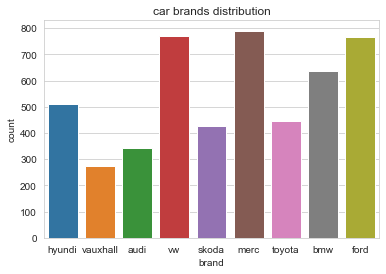

In [53]:
# to determine car brands in the column

sns.set_style("whitegrid")
sns.countplot(x = "brand", data = car_data)
plt.title("car brands distribution")

Text(0.5, 1.0, 'car~fuelType distribution')

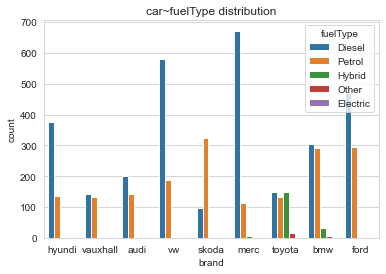

In [54]:
sns.set_style("whitegrid")
sns.countplot(x = "brand", hue = "fuelType", data = car_data)
plt.title("car~fuelType distribution")

#### from above, we can deduce that Diesel operated cars are much more in use and only bmw brand have Electric cars in its distribution 

Text(0.5, 1.0, 'brand ~ fuelType plot')

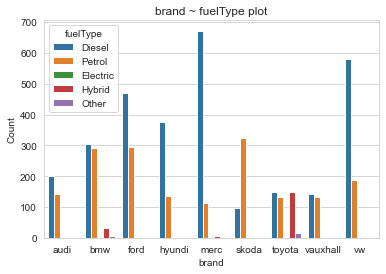

In [55]:
brand_fuelType = car_data.groupby(["brand","fuelType"]).size().reset_index(name="Count")

sns.barplot(data = brand_fuelType, x = "brand", y = "Count", hue = "fuelType")
plt.title("brand ~ fuelType plot")

#### the plot shows that diesel is the primary fuel for all listed car brands except skoda that has petrol as its highest fuel option.

Text(0.5, 1.0, 'brand ~ price plot')

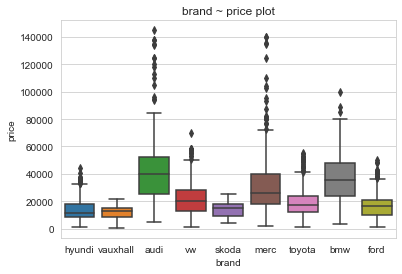

In [56]:
sns.boxplot(x = "brand", y ="price", data = car_data)
plt.title("brand ~ price plot")

##### from the above plot, the highest price for each car brand can be determined along with their lowest and average prices
###### from the plot, "audi" has the highest price with about 146,000 price unit

Text(0.5, 1.0, 'fuelType ~ price plot')

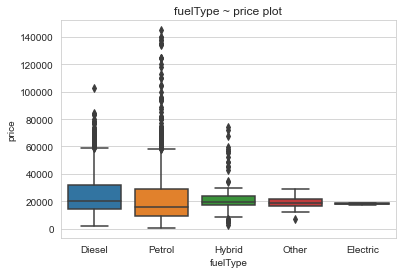

In [57]:
sns.boxplot(x = "fuelType", y ="price", data = car_data)
plt.title("fuelType ~ price plot")

Text(0.5, 1.0, 'transmission ~ price plot')

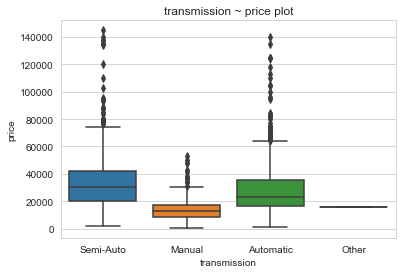

In [58]:
sns.boxplot(x = "transmission", y ="price", data = car_data)
plt.title("transmission ~ price plot")

Text(0.5, 1.0, 'year ~ mileage plot')

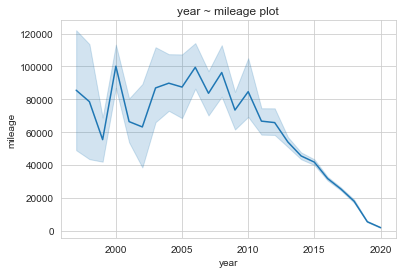

In [59]:
sns.lineplot(x = "year", y = "mileage", data = car_data)
plt.title("year ~ mileage plot")

#### The inference from the above plot is that older cars have higher mileage values than newer ones.

Text(0.5, 1.0, 'brand ~ mean_price plot')

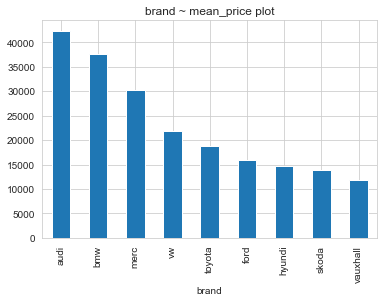

In [60]:
car_data.groupby("brand").price.mean().sort_values(ascending=False).plot.bar()
plt.title("brand ~ mean_price plot")

#### The plot shows that audi cars cost more than other brands on the average.

In [61]:
car_data["price"].max()

145000

In [62]:
car_data["price"].min()

450

In [63]:
costliest_car = car_data[car_data["price"]==145000]
costliest_car["brand"]

3897    audi
Name: brand, dtype: object

In [64]:
cheapest_car = car_data[car_data["price"]==450]
cheapest_car["brand"]

3975    vauxhall
Name: brand, dtype: object

### Feature Engineering

##### Handling outliers
###### from the description of the dataset, outliers exist in mileage, mpg, price and tax columns

In [65]:
upper_lim = car_data["price"].quantile(0.99)
lower_lim = car_data["price"].quantile(0.01)

car_data = car_data[(car_data["price"] < upper_lim) & (car_data["price"] > lower_lim)]


In [66]:
upper_lim = car_data["mileage"].quantile(0.99)
lower_lim = car_data["mileage"].quantile(0.01)

car_data = car_data[(car_data["mileage"] < upper_lim) & (car_data["mileage"] > lower_lim)]


In [67]:
upper_lim = car_data["tax"].quantile(0.99)
lower_lim = car_data["tax"].quantile(0.01)

car_data = car_data[(car_data["tax"] < upper_lim) & (car_data["tax"] > lower_lim)]


In [68]:
upper_lim = car_data["mpg"].quantile(0.99)
lower_lim = car_data["mpg"].quantile(0.01)

car_data = car_data[(car_data["mpg"] < upper_lim) & (car_data["mpg"] > lower_lim)]
car_data

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,12342,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990
...,...,...,...,...,...,...,...,...,...,...,...
4955,16898,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1,17999
4956,14416,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0,28900
4957,15453,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0,8998
4958,14666,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0,23198


In [69]:
car_data.describe()

,carID,year,mileage,tax,mpg,engineSize,price
count,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000,4468.000000
mean,15826.919203,2016.971128,23157.064682,148.859669,47.135318,2.072269,22742.458818
std,2203.232860,2.396516,20651.650736,62.812354,9.919394,0.664541,14072.513439
min,12002.000000,1997.000000,11.000000,10.000000,25.400000,0.000000,2999.000000
25%,13922.250000,2016.000000,5662.750000,145.000000,39.200000,1.600000,12207.500000
50%,15826.500000,2017.000000,18170.000000,145.000000,47.500000,2.000000,18994.500000
75%,17749.250000,2019.000000,35030.250000,150.000000,54.300000,2.500000,29989.250000
max,19629.000000,2020.000000,100552.000000,540.000000,74.300000,5.500000,74480.000000


#### the above table shows that the maximum value for each numerical column has been brought closer to its mean value.

##### One-Hot encoding of categorical columns

In [70]:
add_columns = pd.get_dummies(car_data[["brand", "transmission", "fuelType"]])

In [71]:
car_data.join(add_columns)
car_data.drop(["brand", "transmission", "fuelType"], axis = 1, inplace = True)
car_data.columns
car_data = car_data.join(add_columns)
car_data

,carID,model,year,mileage,tax,mpg,engineSize,price,brand_audi,brand_bmw,...,brand_vauxhall,brand_vw,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,13207,Santa Fe,2019,4223,145.0,39.8,2.2,31995,0,0,...,0,0,0,0,0,1,1,0,0,0
1,17314,GTC,2015,47870,125.0,60.1,2.0,7700,0,0,...,1,0,0,1,0,0,1,0,0,0
2,12342,RS4,2019,5151,145.0,29.1,2.9,58990,1,0,...,0,0,1,0,0,0,0,0,0,1
3,13426,Scirocco,2016,20423,30.0,57.6,2.0,12999,0,0,...,0,1,1,0,0,0,1,0,0,0
4,16004,Scala,2020,3569,145.0,47.1,1.0,16990,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,16898,GL Class,2015,24314,125.0,56.6,2.1,17999,0,0,...,0,0,1,0,0,0,1,0,0,0
4956,14416,6 Series,2017,18000,145.0,51.4,3.0,28900,0,1,...,0,0,1,0,0,0,1,0,0,0
4957,15453,CC,2015,84932,30.0,60.1,2.0,8998,0,0,...,0,1,0,1,0,0,1,0,0,0
4958,14666,A7,2017,30150,145.0,62.8,3.0,23198,1,0,...,0,0,0,0,0,1,1,0,0,0


In [72]:
x = car_data.drop(["carID", "model","price"], axis=1)
y = car_data["price"]

In [73]:
x

,year,mileage,tax,mpg,engineSize,brand_audi,brand_bmw,brand_ford,brand_hyundi,brand_merc,...,brand_vauxhall,brand_vw,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2019,4223,145.0,39.8,2.2,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
1,2015,47870,125.0,60.1,2.0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
2,2019,5151,145.0,29.1,2.9,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,20423,30.0,57.6,2.0,0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
4,2020,3569,145.0,47.1,1.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955,2015,24314,125.0,56.6,2.1,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4956,2017,18000,145.0,51.4,3.0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4957,2015,84932,30.0,60.1,2.0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4958,2017,30150,145.0,62.8,3.0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0


In [74]:
y

0       31995
1        7700
2       58990
3       12999
4       16990
        ...  
4955    17999
4956    28900
4957     8998
4958    23198
4959    14900
Name: price, Length: 4468, dtype: int64

In [75]:
#train_test_split

x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [76]:
# Scaling

scaler = StandardScaler()
scaler.fit_transform(x_train, x_test)

array([[ 0.83661237, -0.83872236, -0.07825932, ..., -0.09944747,
        -0.05297014, -0.73339331],
       [ 0.00361262, -0.17165499,  0.24121392, ..., -0.09944747,
        -0.05297014,  1.36352484],
       [ 0.00361262, -0.21405476, -0.07825932, ..., -0.09944747,
        -0.05297014,  1.36352484],
       ...,
       [-1.66238689,  1.4916396 ,  0.16134561, ..., -0.09944747,
        -0.05297014, -0.73339331],
       [ 1.25311225, -1.05358928, -0.07825932, ..., -0.09944747,
        -0.05297014, -0.73339331],
       [-0.41288726,  3.05459924, -0.39773257, ..., -0.09944747,
        -0.05297014, -0.73339331]])

#### Modelling and prediction

In [77]:
# Random Forest model

rf_model = RandomForestRegressor(random_state = 1)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=1)

In [78]:
rf_prediction = rf_model.predict(x_test)

In [88]:
rf_score = r2_score(rf_prediction, y_test)*100
rf_score = round(rf_score)
print(f'{rf_score}%')

95%


In [94]:
rf_MAE = mean_absolute_error(rf_prediction, y_test)
rf_MAE =round(rf_MAE)
rf_MAE

1963

In [95]:
rf_MSE =mean_squared_error(y_test, rf_prediction)
rf_RMSE = math.sqrt(rf_MSE)
rf_RMSE = round(rf_RMSE)
rf_RMSE

3083

In [82]:
# linear regression model

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)


LinearRegression()

In [83]:
lr_prediction = lr_model.predict(x_test)

In [89]:
lr_score = r2_score(lr_prediction, y_test)
print(f'{round(lr_score*100)}%')

81%


In [96]:
lr_MAE = mean_absolute_error(lr_prediction, y_test)
lr_MAE = round(lr_MAE)
lr_MAE

4194

In [98]:
lr_MSE =mean_squared_error(y_test, lr_prediction)
lr_RMSE = math.sqrt(lr_MSE)
lr_RMSE = round(lr_RMSE)
lr_RMSE

5730

In [102]:
model = ["Random Forest", "Linear Regression"]
r2_score = ["95%"," 81%"]
MAE = [1963, 4194]
RMSE = [3083, 5730]
table = pd.DataFrame({"Model": model, "R2_score": r2_score, "Mean absolute error": MAE, "Root mean square error": RMSE})
table

,Model,R2_score,Mean absolute error,Root mean square error
0,Random Forest,95%,1963,3083
1,Linear Regression,81%,4194,5730


### from the results of both models, we can deduce that Random forest performed better than linear Regression and suits the problem solution better.